# ***실습 5-1 : Modern CNN***

## ***Import Module***

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import Model

print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))

TensorFlow 2.x selected.
Module Loaded.
TensorFlow Version :2.0.0


In [0]:
# reset of notebook state
#tf.keras.backend.clear_session() 

## ***DataSet***

### *Load*

In [3]:
#data_set = tf.keras.datasets.mnist
#data_set = tf.keras.datasets.fashion_mnist
data_set = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = data_set.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

### *Preprocessing*

In [4]:
# Add a channels dimension for MNIST dataset: (28,28)
#x_train = x_train[..., tf.newaxis]
#x_test = x_test[..., tf.newaxis]

# Converts class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

## ***Model***

### *Define*

### Model_A define: Dropout 사용 model

### Model_B define: Batch Normalization 사용 model

In [5]:
def model_cnn_batchnormal():
  model = tf.keras.models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(32,32,3))) 
  #model.add(Conv2D(64, 3, padding='same', activation='relu'))
  model.add(BatchNormalization())             # BN1
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  #model.add(Conv2D(128, 7, padding='same', activation='relu'))
  #model.add(Conv2D(32, 1, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(BatchNormalization())             # BN2
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # conv 3
  model.add(Conv2D(64, 3, padding='same', activation='relu')) 
  #model.add(Conv2D(64, 3, padding='same', activation='relu')) 
  model.add(BatchNormalization())             # BN3
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # dense layers
  model.add(Flatten(name='flatten'))
  model.add(Dense(1000, activation='relu',name='dense_256'))
  model.add(Dense(10, activation='softmax', name='dense_10'))

  return model

model_BN=model_cnn_batchnormal()

model_BN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

### *Compile*

In [0]:
batch_n = 256
epoch_n = 30
lr_default = 1e-2

#### Learning rate schedule 함수

In [0]:
def lr_schedule_dbase(epoch):
    lr = lr_default
    if epoch/epoch_n > 0.7:   
        lr *= 0.5e-3
    elif epoch/epoch_n > 0.6:
        lr *= 1e-3
    elif epoch/epoch_n > 0.5:
        lr *= 1e-2
    elif epoch/epoch_n > 0.4:
        lr *= 1e-1
    print('Drop based Learning rate:', lr)
    return lr

In [8]:
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
import numpy as np

F_LR_CNTRL = True  # learning rate controled optimizer
#F_LR_CNTRL = False  # default optimizer

if F_LR_CNTRL:
  # optimizser의 'learning_rate='를 정의한 함수로 지정
  opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule_dbase(0))
  #opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule_dbase(0))
  # learning schedule callback
  lrate = LearningRateScheduler(lr_schedule_dbase)
  callbacks_list = [lrate]
  #lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0,
  #                              patience=5, min_lr=0.5e-6)
  #callbacks_list = [lrate, lr_reducer]
else:
  opt = 'adam'
  callbacks_list = []


Drop based Learning rate: 0.01


In [0]:
model_BN.compile(optimizer=opt,
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

### *Fit*

Epoch 20/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0276 - accuracy: 0.9911
CPU times: user 1min 7s, sys: 30.2 s, total: 1min 38s   
Wall time: 1min 40
(@Notebook Setting/GPU)

In [10]:
%%time
history_BN = model_BN.fit(x_train, y_train, 
                        batch_size=batch_n, 
                        epochs=epoch_n,
                        callbacks=callbacks_list,
                        validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Drop based Learning rate: 0.01
Epoch 1/30
50000/50000 [==============================] - 7s 139us/sample - loss: 2.7135 - acc: 0.3530 - val_loss: 1.8847 - val_acc: 0.3401
Drop based Learning rate: 0.01
Epoch 2/30
50000/50000 [==============================] - 4s 85us/sample - loss: 1.3471 - acc: 0.5139 - val_loss: 1.6678 - val_acc: 0.4189
Drop based Learning rate: 0.01
Epoch 3/30
50000/50000 [==============================] - 4s 86us/sample - loss: 1.1251 - acc: 0.6000 - val_loss: 1.2177 - val_acc: 0.5769
Drop based Learning rate: 0.01
Epoch 4/30
50000/50000 [==============================] - 4s 85us/sample - loss: 0.9559 - acc: 0.6626 - val_loss: 0.9896 - val_acc: 0.6598
Drop based Learning rate: 0.01
Epoch 5/30
50000/50000 [==============================] - 4s 85us/sample - loss: 0.8294 - acc: 0.7098 - val_loss: 1.0342 - val_acc: 0.6579
Drop based Learning rate: 0.01
Epoch 6/30
50000/50000 [==============================] - 4s 85us/sa

#### **conv(3)**    
Total params: 4,479,618 = Trainable params: 4,478,722 + Non-trainable params: 896    
max 'val_acc' : 0.7979

#### **conv(3) x 1**
Total params: 4,807,298 = Trainable params: 4,806,402 + Non-trainable params: 896    
max 'val_acc' : 0.7827      

#### **conv(3) x 2**    
Total params: 4,627,202 = Trainable params: 4,626,306 + Non-trainable params: 896     
max 'val_acc' : 0.7982

#### **conv(3) + conv(1) + conv(3)**
Total params: 4,520,738 = Trainable params: 4,519,842 + Non-trainable params: 896    
max 'val_acc' : 0.7829


Epoch 20/20
60000/60000 [==============================] - 4s 73us/sample - loss: 2.1958e-04 - accuracy: 1.0000
CPU times: user 1min 1s, sys: 25.2 s, total: 1min 26s   
Wall time: 1min 27s (@Notebook Setting/GPU)

## ***Analysis***

In [11]:
import numpy as np

print(np.max(history_BN.history['val_acc']))

0.7777


### *Plot*

In [12]:
history_BN.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])

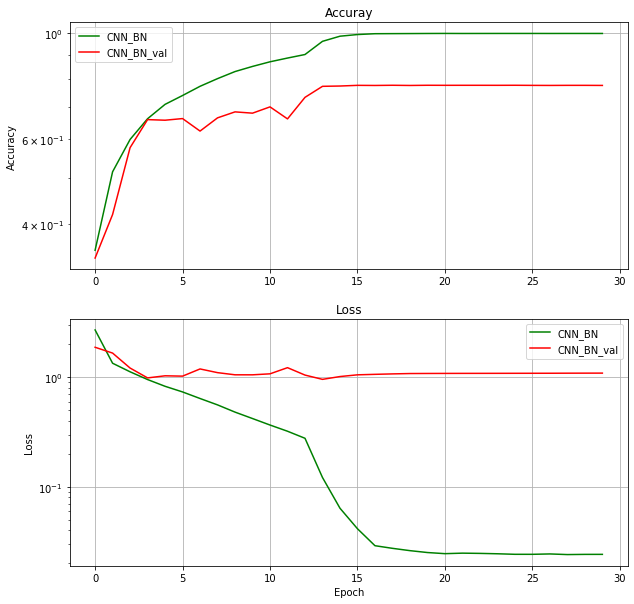

In [13]:

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.semilogy(history_BN.history['acc'], 'g', label='CNN_BN')
plt.semilogy(history_BN.history['val_acc'], 'r', label='CNN_BN_val')
plt.grid(True)
plt.ylabel('Accuracy')
#plt.ylim([0.6, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.semilogy(history_BN.history['loss'], 'g', label='CNN_BN')
plt.semilogy(history_BN.history['val_loss'], 'r', label='CNN_BN_val')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.0, 0.6])
plt.legend(loc='best')
plt.show()



## **실습과제**